In [233]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from scipy import interpolate
from datetime import datetime as dt

In [234]:
df = pd.read_csv('OriginalRiconciled.csv', sep = ',', low_memory=False)

In [235]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1965114 entries, 0 to 1965113
Data columns (total 29 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Company_Name                 object 
 1   Project_Name                 object 
 2   Start_Date                   object 
 3   End_Date                     object 
 4   Tariff                       float64
 5   Energy_Source_Level_1        object 
 6   Energy_Source_Level_2        object 
 7   Energy_Source_Level_3        object 
 8   Technology                   object 
 9   Capacity                     float64
 10  Wind_Turbine_Hub_Height      float64
 11  Wind_Turbine_Rotor_Diameter  float64
 12  Wind_Turbine_Model           object 
 13  Wind_Turbine_Capacity        float64
 14  Wind_Turbine_Number          float64
 15  Solar_Mounting_Tyoe          object 
 16  CHP                          object 
 17  Region                       object 
 18  Municipality                 object 
 19  

In [236]:
df.dtypes

Company_Name                    object
Project_Name                    object
Start_Date                      object
End_Date                        object
Tariff                         float64
Energy_Source_Level_1           object
Energy_Source_Level_2           object
Energy_Source_Level_3           object
Technology                      object
Capacity                       float64
Wind_Turbine_Hub_Height        float64
Wind_Turbine_Rotor_Diameter    float64
Wind_Turbine_Model              object
Wind_Turbine_Capacity          float64
Wind_Turbine_Number            float64
Solar_Mounting_Tyoe             object
CHP                             object
Region                          object
Municipality                    object
Municipality_Code              float64
Postcode                        object
Address                         object
Lat                            float64
Lon                            float64
NUTS1                           object
NUTS2                    

In [237]:
#Verifico se in una riga ci sono production, ESL2 e capacity posti a null contemporaneamnte
df_null_comuni = df[(df['Production'].isnull()&df['Energy_Source_Level_2'].isnull()&df['Capacity'].isnull())]
df_null_comuni.info(verbose=True)
#Non ce ne sono :)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Company_Name                 0 non-null      object 
 1   Project_Name                 0 non-null      object 
 2   Start_Date                   0 non-null      object 
 3   End_Date                     0 non-null      object 
 4   Tariff                       0 non-null      float64
 5   Energy_Source_Level_1        0 non-null      object 
 6   Energy_Source_Level_2        0 non-null      object 
 7   Energy_Source_Level_3        0 non-null      object 
 8   Technology                   0 non-null      object 
 9   Capacity                     0 non-null      float64
 10  Wind_Turbine_Hub_Height      0 non-null      float64
 11  Wind_Turbine_Rotor_Diameter  0 non-null      float64
 12  Wind_Turbine_Model           0 non-null      object 
 13  Wind_Turbine_Capacity        0 n

In [238]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1965114 entries, 0 to 1965113
Data columns (total 29 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Company_Name                 object 
 1   Project_Name                 object 
 2   Start_Date                   object 
 3   End_Date                     object 
 4   Tariff                       float64
 5   Energy_Source_Level_1        object 
 6   Energy_Source_Level_2        object 
 7   Energy_Source_Level_3        object 
 8   Technology                   object 
 9   Capacity                     float64
 10  Wind_Turbine_Hub_Height      float64
 11  Wind_Turbine_Rotor_Diameter  float64
 12  Wind_Turbine_Model           object 
 13  Wind_Turbine_Capacity        float64
 14  Wind_Turbine_Number          float64
 15  Solar_Mounting_Tyoe          object 
 16  CHP                          object 
 17  Region                       object 
 18  Municipality                 object 
 19  

In [239]:
#REPLACE NAN CON 0 in tutto il csv
df = df.replace(to_replace = np.nan, value = 0)

#Conversione delle colonne <object> in colonne <string>
for y in df.columns:
    if df[y].dtype==object:
        df[y] = df[y].astype('string')

In [240]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1965114 entries, 0 to 1965113
Data columns (total 29 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Company_Name                 string 
 1   Project_Name                 string 
 2   Start_Date                   string 
 3   End_Date                     string 
 4   Tariff                       float64
 5   Energy_Source_Level_1        string 
 6   Energy_Source_Level_2        string 
 7   Energy_Source_Level_3        string 
 8   Technology                   string 
 9   Capacity                     float64
 10  Wind_Turbine_Hub_Height      float64
 11  Wind_Turbine_Rotor_Diameter  float64
 12  Wind_Turbine_Model           string 
 13  Wind_Turbine_Capacity        float64
 14  Wind_Turbine_Number          float64
 15  Solar_Mounting_Tyoe          string 
 16  CHP                          string 
 17  Region                       string 
 18  Municipality                 string 
 19  

In [241]:
#nelle colonne di stringhe, sostituzione di 0 con ND (Non Definito)
for y in df.columns:
    if df[y].dtype=='string[python]':
        df[y].replace({"0": "ND"}, inplace=True)

In [242]:
df

,Company_Name,Project_Name,Start_Date,End_Date,Tariff,Energy_Source_Level_1,Energy_Source_Level_2,Energy_Source_Level_3,Technology,Capacity,...,Municipality_Code,Postcode,Address,Lat,Lon,NUTS1,NUTS2,NUTS3,Production,Country
0,Otto Wartmann,BHKW Wartmann Holzhof Bissegg,2004-07-01,2024-12-31,578452.0,Renewable energy,Bioenergy,Biomass and biogas,Other or unspecified technology,0.755,...,8514.0,8514.0,Holzhof / Hüttlingerstrasse 22,47.5619,9.0353,CH0,CH05,CH057,1127.500,Switzerland
1,Davos Biogas GmbH,Biogasanlage Davos,2004-11-24,2024-12-31,228421.0,Renewable energy,Bioenergy,Biomass and biogas,Other or unspecified technology,0.080,...,7260.0,7260.0,Duchliweg 13,46.8083,9.8393,CH0,CH05,CH056,499.121,Switzerland
2,Armin Müller-Flühler,B BHKW Armin Müller-Flühler Ermensee,2005-10-04,2025-12-31,622598.0,Renewable energy,Bioenergy,Biomass and biogas,Other or unspecified technology,0.260,...,6294.0,6294.0,Grundacher 2,47.2278,8.2363,CH0,CH06,CH061,1475.020,Switzerland
3,Hydroelectra AG,Wasserkraftanlage Frinvillier,2006-01-01,2031-12-31,349497.0,Renewable energy,Hydro,ND,Other or unspecified technology,0.450,...,2535.0,2535.0,Rue du canal 41,47.1691,7.2549,CH0,CH02,CH021,1327.940,Switzerland
4,Val Biogas GmbH,Biogas Val Visp,2006-01-01,2026-12-31,598310.0,Renewable energy,Bioenergy,Biomass and biogas,Other or unspecified technology,0.480,...,3930.0,3930.0,Grosseye 12,46.2942,7.9084,CH0,CH01,CH012,1425.600,Switzerland
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1965109,Větrné elektrárny Bor s.r.o.,ND,ND,ND,0.0,Renewable energy,Wind,ND,Onshore,4.520,...,0.0,348 15,ND,49.9000,12.7667,CZ0,CZ03,CZ032,0.000,Czechia
1965110,"innogy Energo, s.r.o.",ND,ND,ND,0.0,Renewable energy,Other or unspecified,ND,ND,0.130,...,0.0,266 01,ND,49.9500,14.1000,CZ0,CZ02,CZ020,0.000,Czechia
1965111,ZŠ Liberec Ještědská,ND,ND,ND,0.0,Renewable energy,Other or unspecified,ND,ND,0.060,...,0.0,460 08,ND,50.7722,14.9556,CZ0,CZ05,CZ051,0.000,Czechia
1965112,Teplo Hranice s.r.o.,ND,ND,ND,0.0,Renewable energy,Other or unspecified,ND,ND,0.400,...,0.0,753 01,ND,49.5796,17.7333,CZ0,CZ07,CZ071,0.000,Czechia


In [243]:
df.shape

(1965114, 29)

In [244]:
#Elimino righe duplicate
df.drop_duplicates(subset=None, 
                          inplace=True, 
                          ignore_index=True)
#df.drop('Unnamed: 0', inplace=True, axis=1)
#df.drop('Unnamed: 0.1', inplace=True, axis=1)
df.shape

(1952518, 29)

In [245]:
#Se la colonna ESL1 ha sempre lo stesso valore la elimino
boolean_ESL1 = df['Energy_Source_Level_1'].str.contains('Renewable energy')
total_occurence = boolean_ESL1.sum()
if total_occurence==df.shape[0]:
    print("Energy Source Level 1 ha sempre lo stesso valore, cancello la colonna")
    df.drop('Energy_Source_Level_1', inplace=True, axis=1)
df.shape

Energy Source Level 1 ha sempre lo stesso valore, cancello la colonna


(1952518, 28)

In [246]:
#Conversione delle colonne <object> in colonne <string>
for y in df.columns:
    if df[y].dtype==object:
        df[y] = df[y].astype('string')

In [247]:
df.dtypes

Company_Name                    string
Project_Name                    string
Start_Date                      string
End_Date                        string
Tariff                         float64
Energy_Source_Level_2           string
Energy_Source_Level_3           string
Technology                      string
Capacity                       float64
Wind_Turbine_Hub_Height        float64
Wind_Turbine_Rotor_Diameter    float64
Wind_Turbine_Model              string
Wind_Turbine_Capacity          float64
Wind_Turbine_Number            float64
Solar_Mounting_Tyoe             string
CHP                             string
Region                          string
Municipality                    string
Municipality_Code              float64
Postcode                        string
Address                         string
Lat                            float64
Lon                            float64
NUTS1                           string
NUTS2                           string
NUTS3                    

In [248]:
#Rinomina delle colonna
df = df.rename(columns={'Company_Name':'Company', 'Project_Name':'Project','Start_Date':'Start', 'End_Date':'End', 'Energy_Source_Level_2':'ESL2', 'Energy_Source_Level_3':'ESL3','Wind_Turbine_Hub_Height':'Hub Height', 'Wind_Turbine_Rotor_Diameter':'Turbine Rotor Diameter', 'Wind_Turbine_Model':'Turbine Model', 'Wind_Turbine_Number':'Turbine Number','Wind_Turbine_Capacity':'Turbine Capacity','Solar_Mounting_Tyoe':'Solar Positioning', 'Municipality_Code':'Municipality Code'})

In [249]:
#Le tariffe negative sono un dato errato, lo imposto a 0
boolean_negativeTariff = df['Tariff'] < 0
total_occurenceTariff = boolean_negativeTariff.sum()
if(total_occurenceTariff>0):
    for value in df['Tariff']:
        if value < 0:
            df = df.replace(to_replace = value, value = 0)
    boolean_negativeTariff = df['Tariff'] < 0
    total_occurenceTariff = boolean_negativeTariff.sum()
    print(total_occurenceTariff)
    
#Le capacità negative sono un dato errato, lo imposto a 0
boolean_negativeCapacity = df['Capacity'] < 0
total_occurenceCapacity = boolean_negativeCapacity.sum()
if(total_occurenceCapacity>0):
    for value in df['Capacity']:
        if value < 0:
            df = df.replace(to_replace = value, value = 0)
    boolean_negativeCapacity = df['Capacity'] < 0
    total_occurenceCapacity = boolean_negativeCapacity.sum()
    print(total_occurenceCapacity)


boolean_negativeTurbineCapacity = df['Turbine Capacity'] < 0
total_occurenceTurbineCapacity = boolean_negativeTurbineCapacity.sum()
if(total_occurenceTurbineCapacity>0):
    for value in df['Turbine Capacity']:
        if value < 0:
            df = df.replace(to_replace = value, value = 0)
    boolean_negativeTurbineCapacity = df['Turbine Capacity'] < 0
    total_occurenceTurbineCapacity = boolean_negativeCapacity.sum()
    print(total_occurenceTurbineCapacity)
    
#Valori negativi di diametro sono errati, impostiamo a 0
boolean_negativeDiameter = df['Turbine Rotor Diameter'] < 0
total_occurenceDiameter = boolean_negativeDiameter.sum()
if(total_occurenceDiameter>0):
    for value in df['Turbine Rotor Diameter']:
        if value < 0:
            df = df.replace(to_replace = value, value = 0)
    boolean_negativeDiameter = df['Turbine Rotor Diameter'] < 0
    total_occurenceDiameter = boolean_negativeDiameter.sum()
    print(total_occurenceDiameter)
    
#Valori negativi di altezza degli hub sono errati, impostiamo a 0
boolean_negativeHeight = df['Hub Height'] < 0
total_occurenceHeight = boolean_negativeHeight.sum()
if(total_occurenceHeight>0):
    for value in df['Hub Height']:
        if value < 0:
            df = df.replace(to_replace = value, value = 0)
    boolean_negativeHeight = df['Hub Height'] < 0
    total_occurenceHeight = boolean_negativeHeight.sum()
    print(total_occurenceHeight)

0


In [250]:
df

,Company,Project,Start,End,Tariff,ESL2,ESL3,Technology,Capacity,Hub Height,...,Municipality Code,Postcode,Address,Lat,Lon,NUTS1,NUTS2,NUTS3,Production,Country
0,Otto Wartmann,BHKW Wartmann Holzhof Bissegg,2004-07-01,2024-12-31,578452.0,Bioenergy,Biomass and biogas,Other or unspecified technology,0.755,0.0,...,8514.0,8514.0,Holzhof / Hüttlingerstrasse 22,47.5619,9.0353,CH0,CH05,CH057,1127.500,Switzerland
1,Davos Biogas GmbH,Biogasanlage Davos,2004-11-24,2024-12-31,228421.0,Bioenergy,Biomass and biogas,Other or unspecified technology,0.080,0.0,...,7260.0,7260.0,Duchliweg 13,46.8083,9.8393,CH0,CH05,CH056,499.121,Switzerland
2,Armin Müller-Flühler,B BHKW Armin Müller-Flühler Ermensee,2005-10-04,2025-12-31,622598.0,Bioenergy,Biomass and biogas,Other or unspecified technology,0.260,0.0,...,6294.0,6294.0,Grundacher 2,47.2278,8.2363,CH0,CH06,CH061,1475.020,Switzerland
3,Hydroelectra AG,Wasserkraftanlage Frinvillier,2006-01-01,2031-12-31,349497.0,Hydro,ND,Other or unspecified technology,0.450,0.0,...,2535.0,2535.0,Rue du canal 41,47.1691,7.2549,CH0,CH02,CH021,1327.940,Switzerland
4,Val Biogas GmbH,Biogas Val Visp,2006-01-01,2026-12-31,598310.0,Bioenergy,Biomass and biogas,Other or unspecified technology,0.480,0.0,...,3930.0,3930.0,Grosseye 12,46.2942,7.9084,CH0,CH01,CH012,1425.600,Switzerland
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1952513,Větrné elektrárny Bor s.r.o.,ND,ND,ND,0.0,Wind,ND,Onshore,4.520,0.0,...,0.0,348 15,ND,49.9000,12.7667,CZ0,CZ03,CZ032,0.000,Czechia
1952514,"innogy Energo, s.r.o.",ND,ND,ND,0.0,Other or unspecified,ND,ND,0.130,0.0,...,0.0,266 01,ND,49.9500,14.1000,CZ0,CZ02,CZ020,0.000,Czechia
1952515,ZŠ Liberec Ještědská,ND,ND,ND,0.0,Other or unspecified,ND,ND,0.060,0.0,...,0.0,460 08,ND,50.7722,14.9556,CZ0,CZ05,CZ051,0.000,Czechia
1952516,Teplo Hranice s.r.o.,ND,ND,ND,0.0,Other or unspecified,ND,ND,0.400,0.0,...,0.0,753 01,ND,49.5796,17.7333,CZ0,CZ07,CZ071,0.000,Czechia


[12718, 1768292, 84314, 54195, 2508, 5528, 2614, 22349]
['Switzerland', 'Germany', 'Denmark', 'France', 'Poland', 'Sweden', 'United Kingdom', 'Czechia']


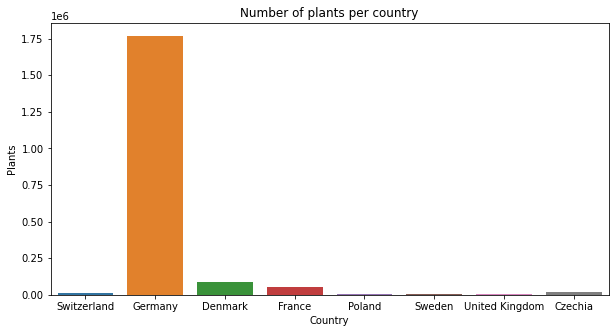

In [251]:
plantsForCountry = []
country=[]

for value in df['Country'].unique():
    boolean = df['Country']==value
    total_occurence = boolean.sum()
    country.append(value)
    plantsForCountry.append(total_occurence)
print(plantsForCountry)
print(country)
plants = pd.DataFrame(list(zip(country,plantsForCountry)), columns = ['Country','Plants'])
a = plants.sort_values(by='Plants', ascending=False)[:3800]
figure = plt.figure(figsize=(10,5))

sns.barplot(y=plants.Plants, x=plants.Country)
plt.xticks()
plt.xlabel('Country')
plt.ylabel('Plants')
plt.title('Number of plants per country')
plt.show()

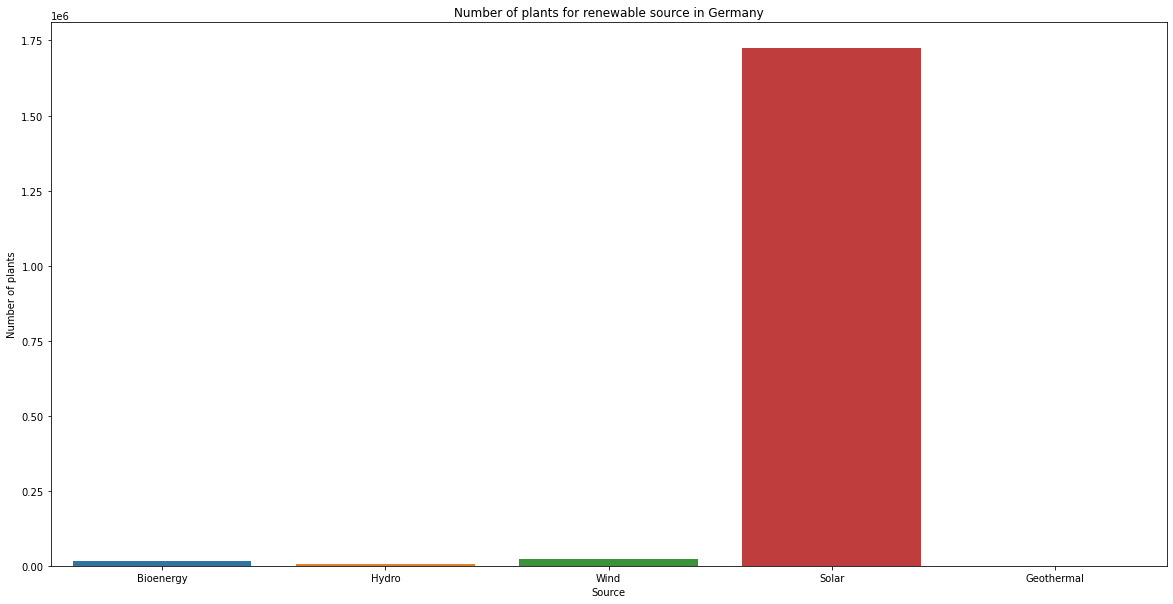

In [332]:
tmp = df.loc[df['Country']=='Germany']

source=[]
installations=[]

for s in tmp['ESL2'].unique():
    boolean = tmp['ESL2']==s
    source.append(s)
    installations.append(boolean.sum())
tmp1 = pd.DataFrame(list(zip(source, installations)), columns=['ESL2', 'NumberofPlants'])
figure = plt.figure(figsize=(20,10))
sns.barplot(y=tmp1.NumberofPlants, x=tmp1.ESL2)
plt.xticks()
plt.xlabel('Source')
plt.ylabel('Number of plants')
plt.title('Number of plants for renewable source in Germany')
plt.show()

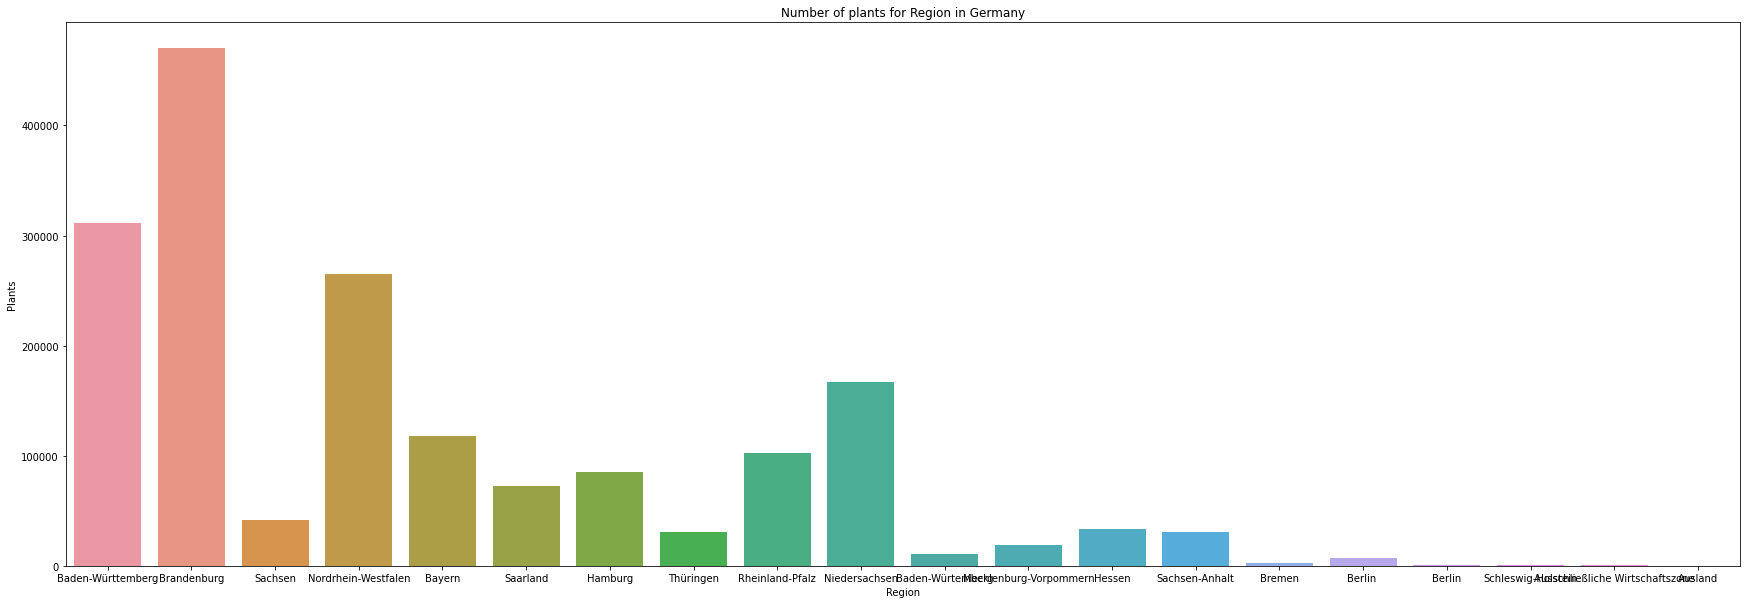

In [339]:
plantsForRegionDE = []
region=[]

tmp = df.loc[df['Country']=='Germany']
tmp = tmp.loc[tmp['Region']!= 'ND']
for value in tmp['Region'].unique():
    boolean = df['Region']==value
    total_occurence = boolean.sum()
    region.append(value)
    plantsForRegionDE.append(total_occurence)
plants = pd.DataFrame(list(zip(region,plantsForRegionDE)), columns = ['Region','Plants'])
a = plants.sort_values(by='Plants', ascending=False)[:3800]
figure = plt.figure(figsize=(30,10))

sns.barplot(y=plants.Plants, x=plants.Region)
plt.xticks()
plt.xlabel('Region')
plt.ylabel('Plants')
plt.title('Number of plants for Region in Germany')
plt.show()

[12718, 1768292, 84314, 54195, 2508, 5528, 2614, 22349]
['Switzerland', 'Germany', 'Denmark', 'France', 'Poland', 'Sweden', 'United Kingdom', 'Czechia']


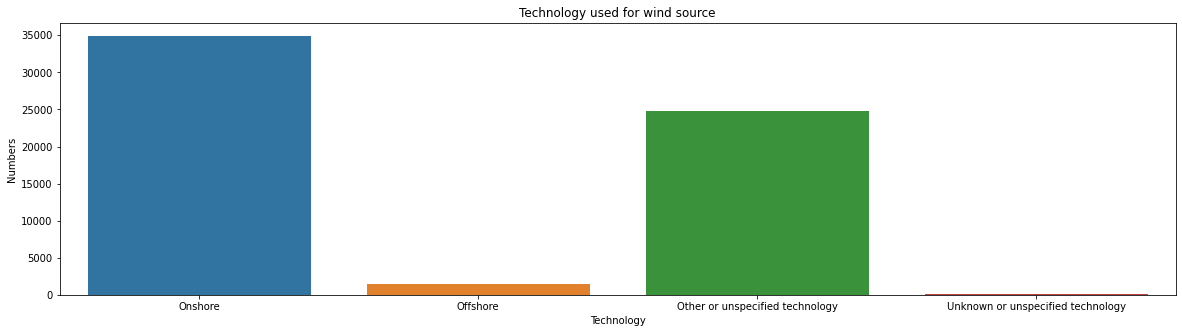

In [252]:
energySource = []
Technology=[]
TechForSource=[]

dfSource = df.loc[df['ESL2']=='Wind']
for value in dfSource['Technology'].unique():
    boolean = df['Technology']==value
    total_occurence = boolean.sum()
    Technology.append(value)
    TechForSource.append(total_occurence)
print(plantsForCountry)
print(country)
techForSourceFrame = pd.DataFrame(list(zip(Technology,TechForSource)), columns = ['Technology','Numbers'])

a = techForSourceFrame.sort_values(by='Numbers', ascending=False)[:3800]
figure = plt.figure(figsize=(20,5))

sns.barplot(y=techForSourceFrame.Numbers, x=techForSourceFrame.Technology)
plt.xticks()
plt.xlabel('Technology')
plt.ylabel('Numbers')
plt.title('Technology used for wind source')
plt.show()

[12718, 1768292, 84314, 54195, 2508, 5528, 2614, 22349]
['Switzerland', 'Germany', 'Denmark', 'France', 'Poland', 'Sweden', 'United Kingdom', 'Czechia']


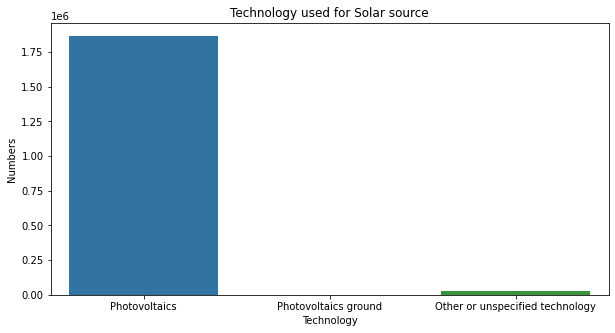

In [253]:
energySource = []
Technology=[]
TechForSource=[]

dfSource = df.loc[df['ESL2']=='Solar']
for value in dfSource['Technology'].unique():
    boolean = df['Technology']==value
    total_occurence = boolean.sum()
    Technology.append(value)
    TechForSource.append(total_occurence)
print(plantsForCountry)
print(country)
techForSourceFrame = pd.DataFrame(list(zip(Technology,TechForSource)), columns = ['Technology','Numbers'])

a = techForSourceFrame.sort_values(by='Numbers', ascending=False)[:3800]
figure = plt.figure(figsize=(10,5))

sns.barplot(y=techForSourceFrame.Numbers, x=techForSourceFrame.Technology)
plt.xticks()
plt.xlabel('Technology')
plt.ylabel('Numbers')
plt.title('Technology used for Solar source')
plt.show()

[12718, 1768292, 84314, 54195, 2508, 5528, 2614, 22349]
['Switzerland', 'Germany', 'Denmark', 'France', 'Poland', 'Sweden', 'United Kingdom', 'Czechia']


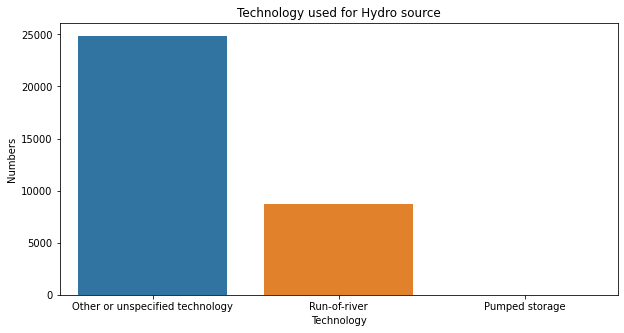

In [254]:
Technology=[]
TechForSource=[]

dfSource = df.loc[df['ESL2']=='Hydro']
for value in dfSource['Technology'].unique():
    boolean = df['Technology']==value
    total_occurence = boolean.sum()
    Technology.append(value)
    TechForSource.append(total_occurence)
print(plantsForCountry)
print(country)
techForSourceFrame = pd.DataFrame(list(zip(Technology,TechForSource)), columns = ['Technology','Numbers'])

a = techForSourceFrame.sort_values(by='Numbers', ascending=False)[:3800]
figure = plt.figure(figsize=(10,5))

sns.barplot(y=techForSourceFrame.Numbers, x=techForSourceFrame.Technology)
plt.xticks()
plt.xlabel('Technology')
plt.ylabel('Numbers')
plt.title('Technology used for Hydro source')
plt.show()

[12718, 1768292, 84314, 54195, 2508, 5528, 2614, 22349]
['Switzerland', 'Germany', 'Denmark', 'France', 'Poland', 'Sweden', 'United Kingdom', 'Czechia']


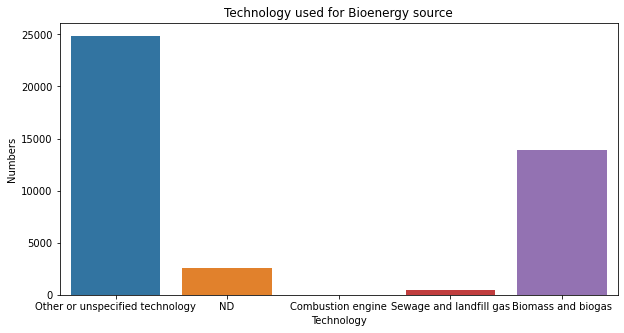

In [255]:
Technology=[]
TechForSource=[]

dfSource = df.loc[df['ESL2']=='Bioenergy']
for value in dfSource['Technology'].unique():
    boolean = df['Technology']==value
    total_occurence = boolean.sum()
    Technology.append(value)
    TechForSource.append(total_occurence)
print(plantsForCountry)
print(country)
techForSourceFrame = pd.DataFrame(list(zip(Technology,TechForSource)), columns = ['Technology','Numbers'])

a = techForSourceFrame.sort_values(by='Numbers', ascending=False)[:3800]
figure = plt.figure(figsize=(10,5))

sns.barplot(y=techForSourceFrame.Numbers, x=techForSourceFrame.Technology)
plt.xticks()
plt.xlabel('Technology')
plt.ylabel('Numbers')
plt.title('Technology used for Bioenergy source')
plt.show()

In [256]:
df['ESL2'].unique()

<StringArray>
[           'Bioenergy',                'Hydro',                'Solar',
                 'Wind',           'Geothermal',               'Marine',
 'Other or unspecified']
Length: 7, dtype: string

['Bioenergy', 'Hydro', 'Solar', 'Wind']
[1281.894803598485, 2557.2724051311184, 49.097896653492114, 2216.173417105263]


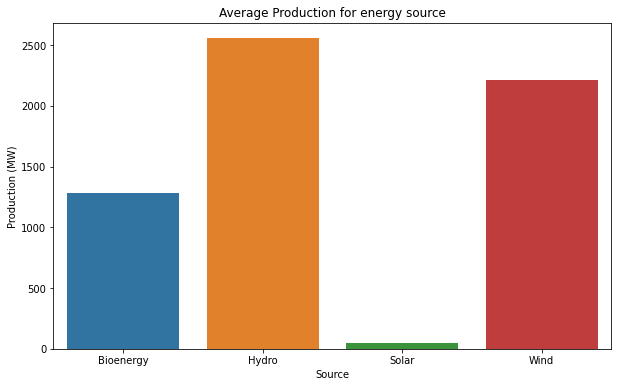

In [257]:
Source=[]
MeanProduction=[]
df1 = df
df1 = df.loc[df['Production']!=0]
for source in df1['ESL2'].unique():
    Source.append(source)
    frameSource = df1.loc[df1['ESL2']==source]
    MeanProduction.append(frameSource['Production'].mean())
print(Source)
print(MeanProduction)

productionFrame = pd.DataFrame(list(zip(Source,MeanProduction)), columns = ['Source','Production'])

a = productionFrame.sort_values(by='Production', ascending=False)[:3800]
figure = plt.figure(figsize=(10,6))
sns.barplot(y=productionFrame.Production, x=productionFrame.Source)
plt.xticks()
plt.xlabel('Source')
plt.ylabel('Production (MW)')
plt.title('Average Production for energy source')
plt.show()

#ATTENZIONE CHE LA PRODUCTION STA SOLO IN SVIZZERA QUINDI IL GRAFICO, DI FATTO, è RIFERITO SOLO
#ALLA SVIZZERA

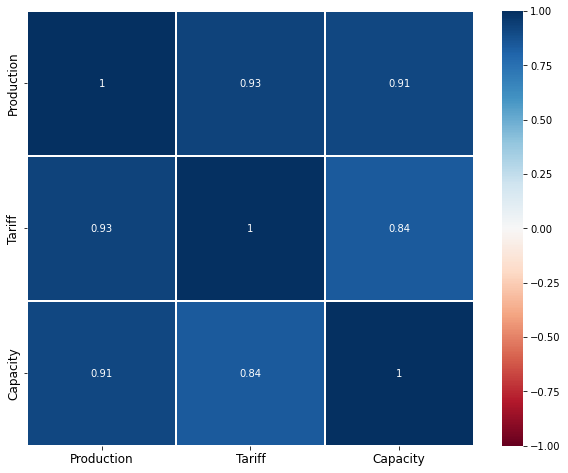

In [258]:
cor = df1[['Production', 'Tariff', 'Capacity']].corr()
sns.heatmap(cor, annot=True, linewidths=0.2, cmap="RdBu", vmin=-1, vmax=1)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [259]:
df.dtypes

Company                    string
Project                    string
Start                      string
End                        string
Tariff                    float64
ESL2                       string
ESL3                       string
Technology                 string
Capacity                  float64
Hub Height                float64
Turbine Rotor Diameter    float64
Turbine Model              string
Turbine Capacity          float64
Turbine Number            float64
Solar Positioning          string
CHP                        string
Region                     string
Municipality               string
Municipality Code         float64
Postcode                   string
Address                    string
Lat                       float64
Lon                       float64
NUTS1                      string
NUTS2                      string
NUTS3                      string
Production                float64
Country                    string
dtype: object

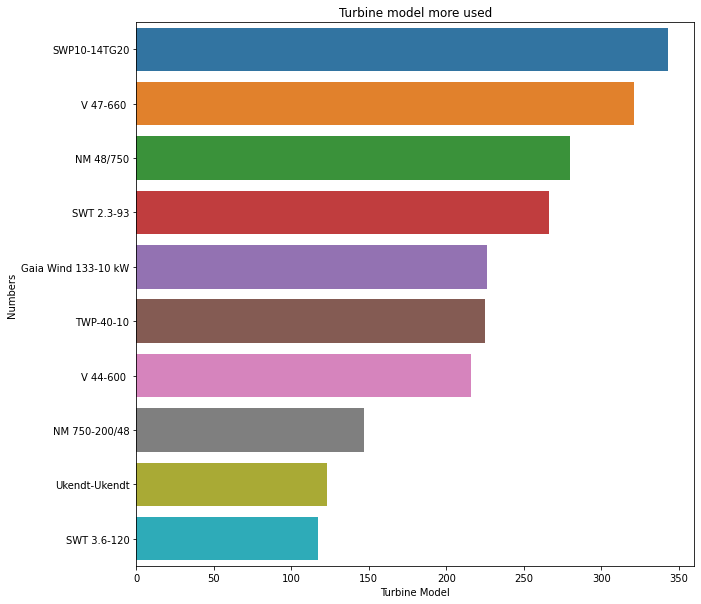

In [265]:
TurbineModel=[]
Number=[]

df2 = df.loc[df['Turbine Model']!='ND']
df2['Turbine Model']
for value in df2['Turbine Model'].unique():
    boolean = df['Turbine Model']==value
    total_occurence = boolean.sum()
    TurbineModel.append(value)
    Number.append(total_occurence)

techForSourceFrame = pd.DataFrame(list(zip(TurbineModel,Number)), columns = ['Model','Numbers'])

a = techForSourceFrame.sort_values(by='Numbers', ascending=False)[:10]
figure = plt.figure(figsize=(10,10))

sns.barplot(y=a.Model, x=a.Numbers)
plt.xticks()
plt.xlabel('Turbine Model')
plt.ylabel('Numbers')
plt.title('Turbine model more used')
plt.show()

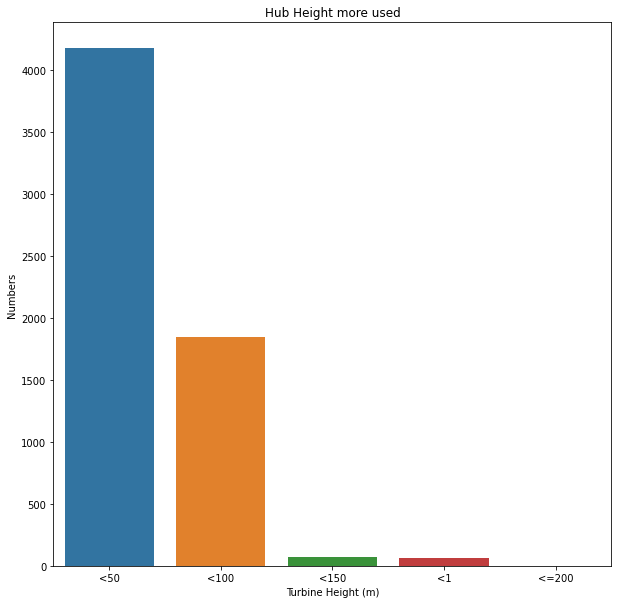

In [269]:
dfH1 = df.loc[df['Hub Height']!=0]
dfH1 = dfH1.loc[df['Hub Height']<=1]
dfh50 = df.loc[df['Hub Height']!=0]
dfH50 = dfh50.loc[df['Hub Height']<50]
dfH50 = dfH50.loc[df['Hub Height']>1]
dfh100 = df.loc[df['Hub Height']!=0]
dfH100 = dfh100.loc[df['Hub Height']>=50]
dfH100 = dfH100.loc[df['Hub Height']<100]
dfh150 = df.loc[df['Hub Height']!=0]
dfH150 = dfh150.loc[df['Hub Height']>=100]
dfH150 = dfH150.loc[df['Hub Height']<150]
dfh200 = df.loc[df['Hub Height']!=0]
dfH200 = dfh200.loc[df['Hub Height']>=150]
dfH200 = dfH200.loc[df['Hub Height']<=200]
dfH150.shape[0]
height = ['<1', '<50', '<100', '<150', '<=200']
number = [dfH1.shape[0], dfH50.shape[0], dfH100.shape[0], dfH150.shape[0], dfH200.shape[0]]

techForSourceFrame = pd.DataFrame(list(zip(height,number)), columns = ['Turbine_Height','Numbers'])

a = techForSourceFrame.sort_values(by='Numbers', ascending=False)[:10]
figure = plt.figure(figsize=(10,10))

sns.barplot(x=a.Turbine_Height, y=a.Numbers)
plt.xticks()
plt.xlabel('Turbine Height (m)')
plt.ylabel('Numbers')
plt.title('Hub Height more used')
plt.show()


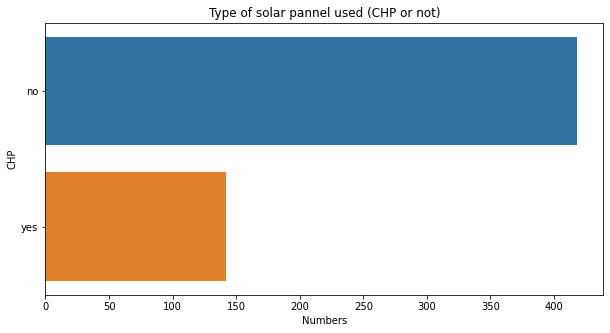

In [270]:
CHP=[]
Number=[]

df2 = df.loc[df['CHP']!='ND']
df2
for value in df2['CHP'].unique():
    boolean = df['CHP']==value
    total_occurence = boolean.sum()
    CHP.append(value)
    Number.append(total_occurence)

techForSourceFrame = pd.DataFrame(list(zip(CHP,Number)), columns = ['CHP','Numbers'])

a = techForSourceFrame.sort_values(by='Numbers', ascending=False)[:10]
figure = plt.figure(figsize=(10,5))

sns.barplot(y=a.CHP, x=a.Numbers)
plt.xticks()
plt.xlabel('Numbers')
plt.ylabel('CHP')
plt.title('Type of solar pannel used (CHP or not)')
plt.show()

In [ ]:
df.info(verbose = True)

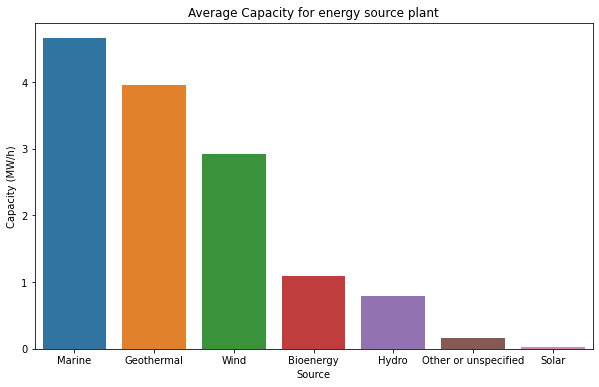

In [272]:
Source=[]
MeanCapacity=[]
df1 = df
df1 = df.loc[df['Capacity']!=0]
for source in df1['ESL2'].unique():
    Source.append(source)
    frameSource = df1.loc[df1['ESL2']==source]
    MeanCapacity.append(frameSource['Capacity'].mean())

productionFrame = pd.DataFrame(list(zip(Source,MeanCapacity)), columns = ['Source','Capacity'])

a = productionFrame.sort_values(by='Capacity', ascending=False)[:3800]
figure = plt.figure(figsize=(10,6))
sns.barplot(y=a.Capacity, x=a.Source)
plt.xticks()
plt.xlabel('Source')
plt.ylabel('Capacity (MW/h)')
plt.title('Average Capacity for energy source plant')
plt.show()


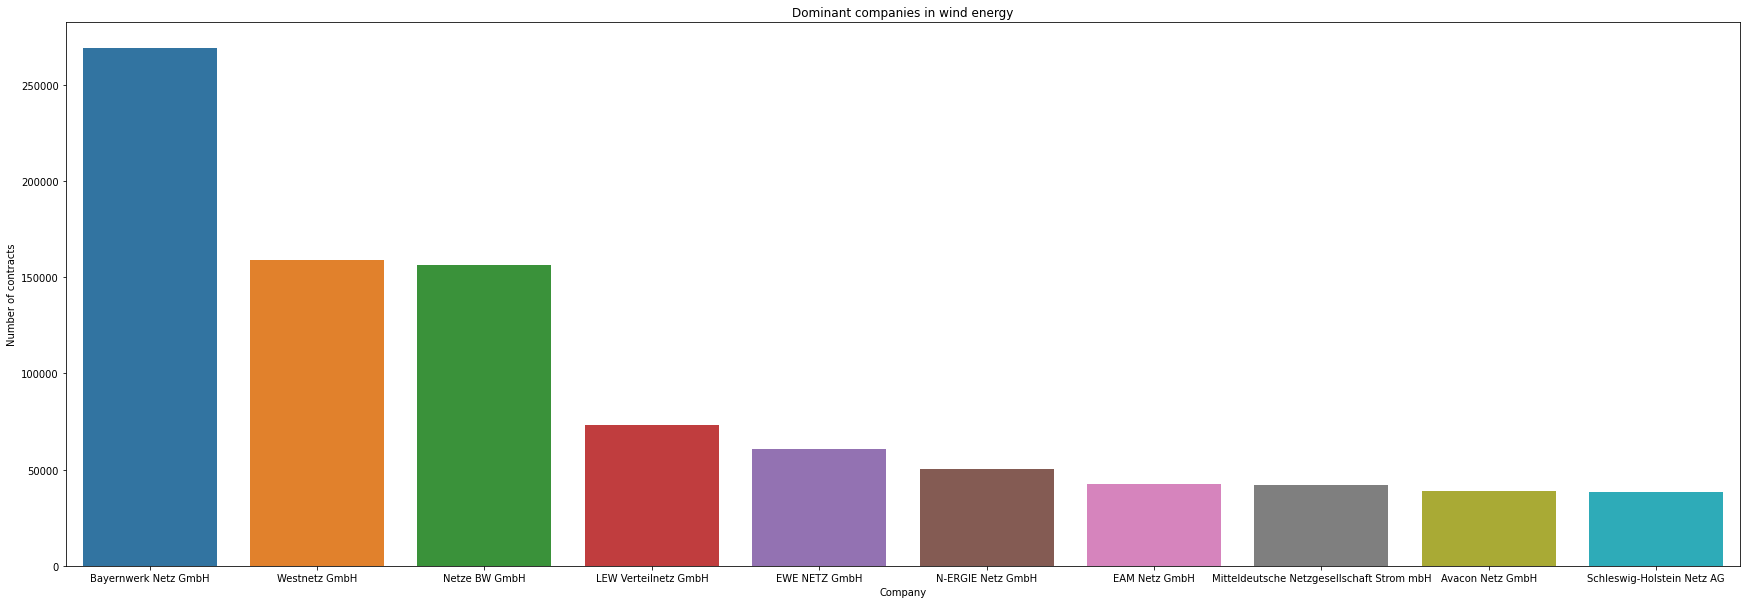

In [340]:
Company=[]
Occurrence=[]

dfSource = df.loc[df['ESL2']=='Wind']
dfSource = dfSource.loc[df['Company']!='ND']
for value in dfSource['Company'].unique():
    boolean = df['Company']==value
    total_occurence = boolean.sum()
    Company.append(value)
    Occurrence.append(total_occurence)
techForSourceFrame = pd.DataFrame(list(zip(Company,Occurrence)), columns = ['Company','Numbers'])

a = techForSourceFrame.sort_values(by='Numbers', ascending=False)[:10]
figure = plt.figure(figsize=(30,10))

sns.barplot(y=a.Numbers, x=a.Company)
plt.xticks()
plt.xlabel('Company')
plt.ylabel('Number of contracts')
plt.title('Dominant companies in wind energy')
plt.show()

In [341]:
Company=[]
Occurrence=[]

dfSource = df.loc[df['ESL2']=='Solar']
dfSource = dfSource.loc[df['Company']!='ND']

for value in dfSource['Company'].unique():
    boolean = df['Company']==value
    total_occurence = boolean.sum()
    Company.append(value)
    Occurrence.append(total_occurence)
techForSourceFrame = pd.DataFrame(list(zip(Company,Occurrence)), columns = ['Company','Numbers'])

a = techForSourceFrame.sort_values(by='Numbers', ascending=False)[:10]
figure = plt.figure(figsize=(30,10))

sns.barplot(y=a.Numbers, x=a.Company)
plt.xticks()
plt.xlabel('Company')
plt.ylabel('Number of contracts')
plt.title('Dominant companies in solar energy')
plt.show()

KeyboardInterrupt: 

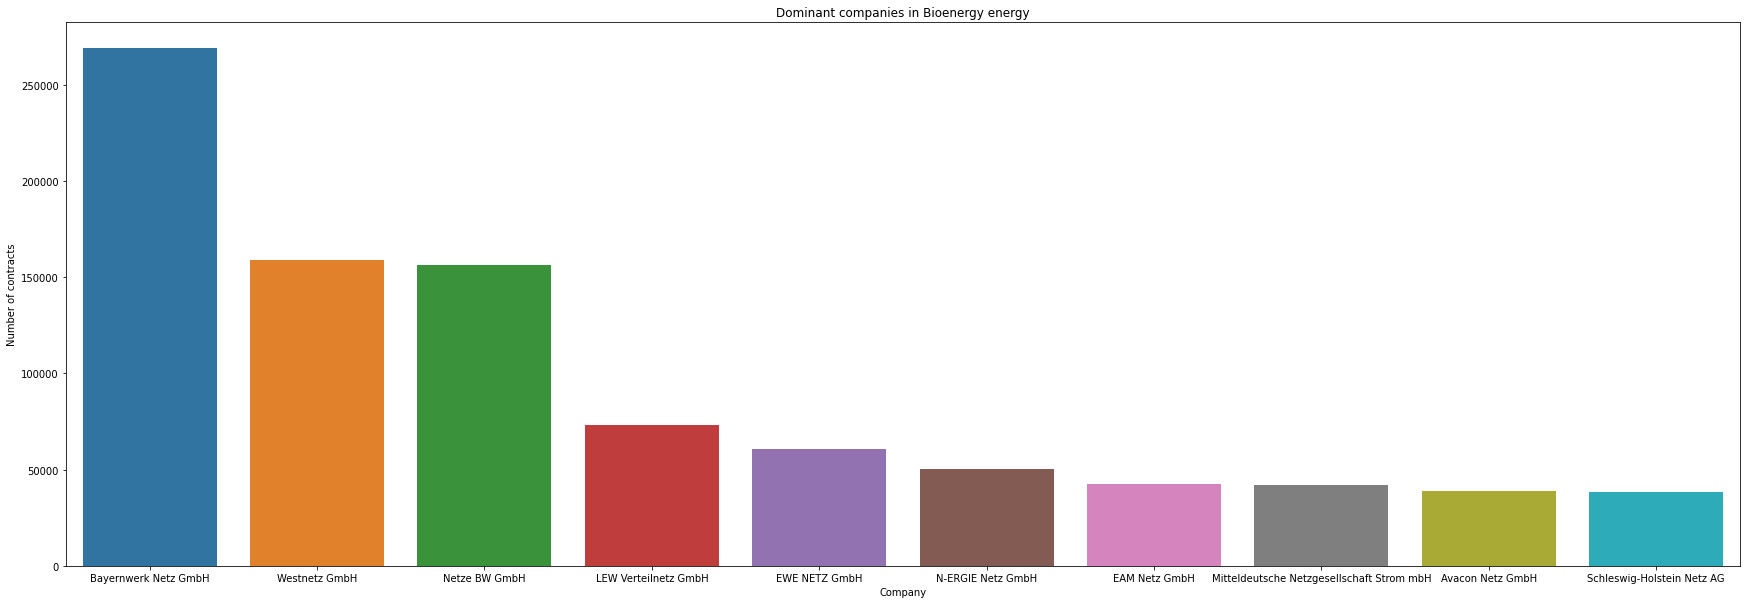

In [330]:
Company=[]
Occurrence=[]

dfSource = df.loc[df['ESL2']=='Bioenergy']
dfSource = dfSource.loc[df['Company']!='ND']
for value in dfSource['Company'].unique():
    boolean = df['Company']==value
    total_occurence = boolean.sum()
    Company.append(value)
    Occurrence.append(total_occurence)
techForSourceFrame = pd.DataFrame(list(zip(Company,Occurrence)), columns = ['Company','Numbers'])

a = techForSourceFrame.sort_values(by='Numbers', ascending=False)[:10]
figure = plt.figure(figsize=(30,10))

sns.barplot(y=a.Numbers, x=a.Company)
plt.xticks()
plt.xlabel('Company')
plt.ylabel('Number of contracts')
plt.title('Dominant companies in Bioenergy energy')
plt.show()

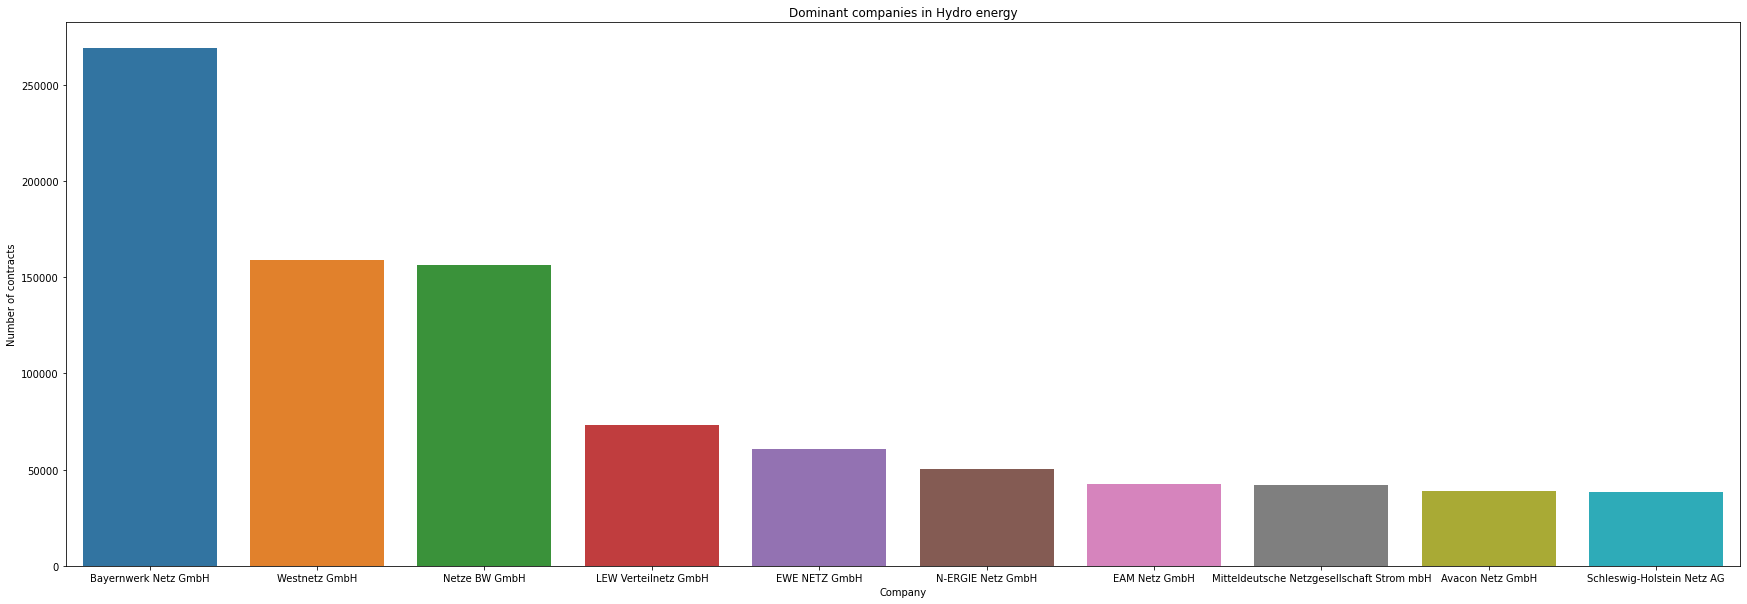

In [329]:
Company=[]
Occurrence=[]

dfSource = df.loc[df['ESL2']=='Hydro']
dfSource = dfSource.loc[df['Company']!='ND']
for value in dfSource['Company'].unique():
    boolean = df['Company']==value
    total_occurence = boolean.sum()
    Company.append(value)
    Occurrence.append(total_occurence)
techForSourceFrame = pd.DataFrame(list(zip(Company,Occurrence)), columns = ['Company','Numbers'])

a = techForSourceFrame.sort_values(by='Numbers', ascending=False)[:10]
figure = plt.figure(figsize=(30,10))

sns.barplot(y=a.Numbers, x=a.Company)
plt.xticks()
plt.xlabel('Company')
plt.ylabel('Number of contracts')
plt.title('Dominant companies in Hydro energy')
plt.show()

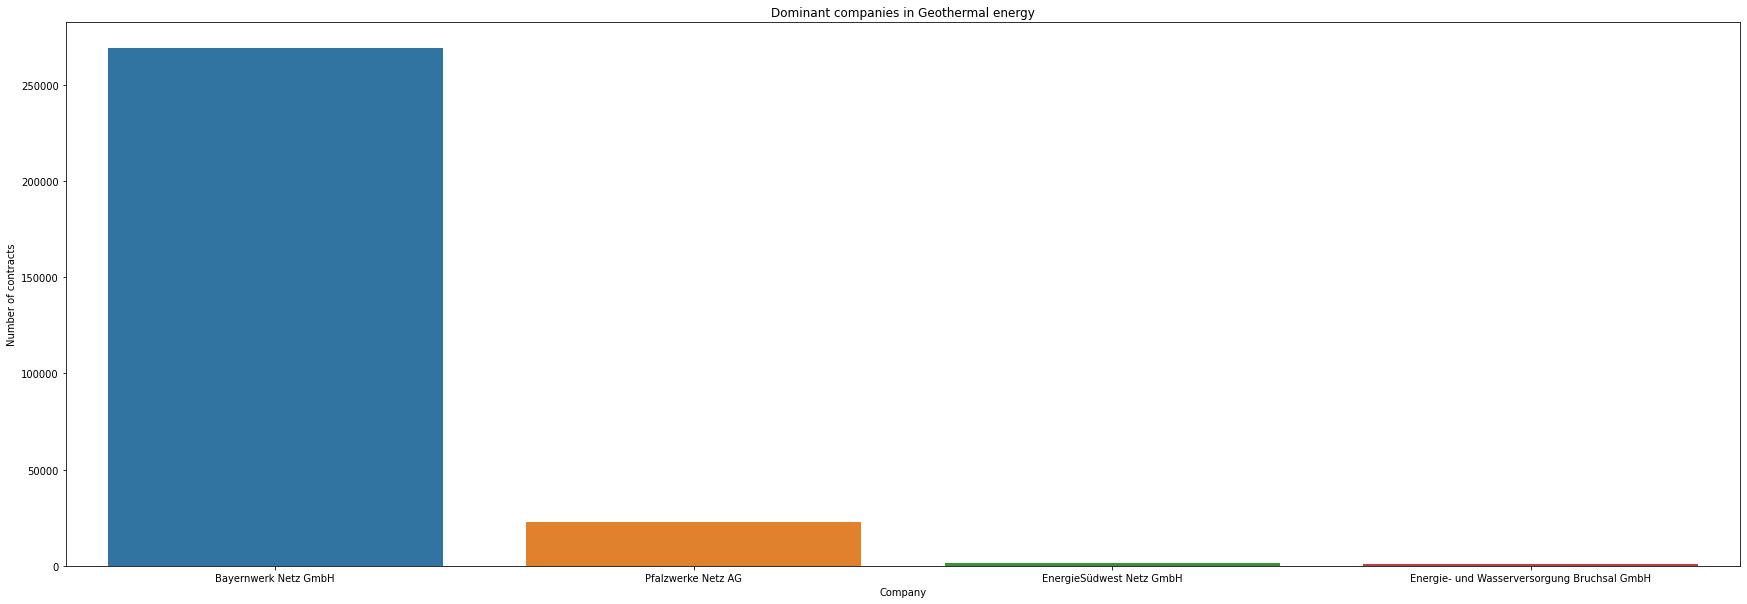

In [328]:
Company=[]
Occurrence=[]

dfSource = df.loc[df['ESL2']=='Geothermal']
dfSource = dfSource.loc[df['Company']!='ND']

for value in dfSource['Company'].unique():
    boolean = df['Company']==value
    total_occurence = boolean.sum()
    Company.append(value)
    Occurrence.append(total_occurence)
techForSourceFrame = pd.DataFrame(list(zip(Company,Occurrence)), columns = ['Company','Numbers'])

a = techForSourceFrame.sort_values(by='Numbers', ascending=False)[:10]
figure = plt.figure(figsize=(30,10))

sns.barplot(y=a.Numbers, x=a.Company)
plt.xticks()
plt.xlabel('Company')
plt.ylabel('Number of contracts')
plt.title('Dominant companies in Geothermal energy')
plt.show()

In [286]:
dFrame1

,Date,ESL2,Tariff,Period,Rate
0,2004-07-01,Bioenergy,578452.0,7488,28196.444979
2,2005-10-04,Bioenergy,622598.0,7393,30738.302448
4,2006-01-01,Bioenergy,598310.0,7669,28476.092059
32,2006-04-01,Bioenergy,473031.0,7579,22780.883362
35,2006-04-01,Bioenergy,630327.0,7579,30356.162422
...,...,...,...,...,...
12689,2018-01-02,Hydro,5216570.0,9160,207865.507642
12699,2018-05-09,Hydro,533021.0,7327,26552.840863
12704,2018-06-20,Hydro,886941.0,9325,34716.725469
12705,2018-06-20,Hydro,753709.0,9325,29501.746381


[1, 1, 1, 1, 1, 1]


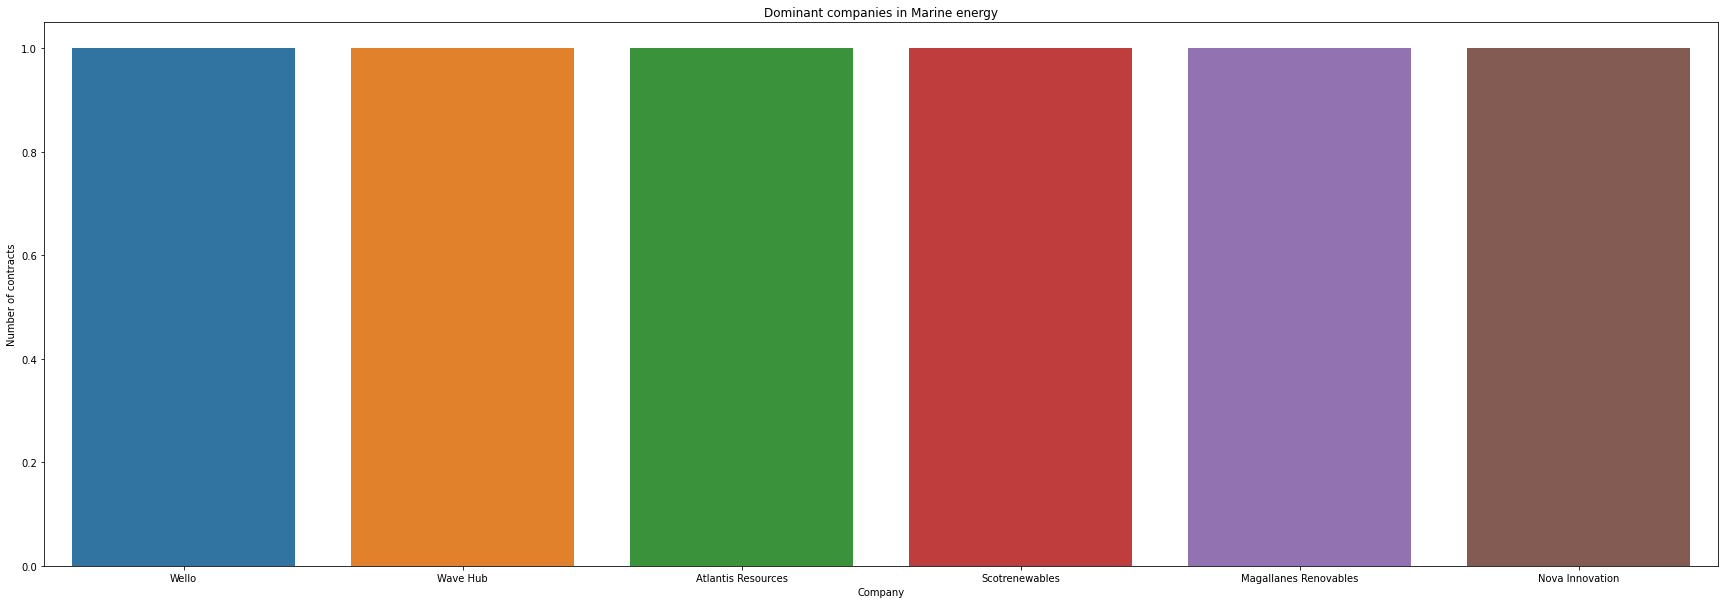

In [327]:
Company=[]
Occurrence=[]

dfSource = df.loc[df['ESL2']=='Marine']
dfSource = dfSource.loc[df['Company']!='ND']
for value in dfSource['Company'].unique():
    boolean = df['Company']==value
    total_occurence = boolean.sum()
    Company.append(value)
    Occurrence.append(total_occurence)
techForSourceFrame = pd.DataFrame(list(zip(Company,Occurrence)), columns = ['Company','Numbers'])
print(Occurrence)
a = techForSourceFrame.sort_values(by='Numbers', ascending=False)[:20]
figure = plt.figure(figsize=(30,10))

sns.barplot(y=a.Numbers, x=a.Company)
plt.xticks()
plt.xlabel('Company')
plt.ylabel('Number of contracts')
plt.title('Dominant companies in Marine energy')
plt.show()

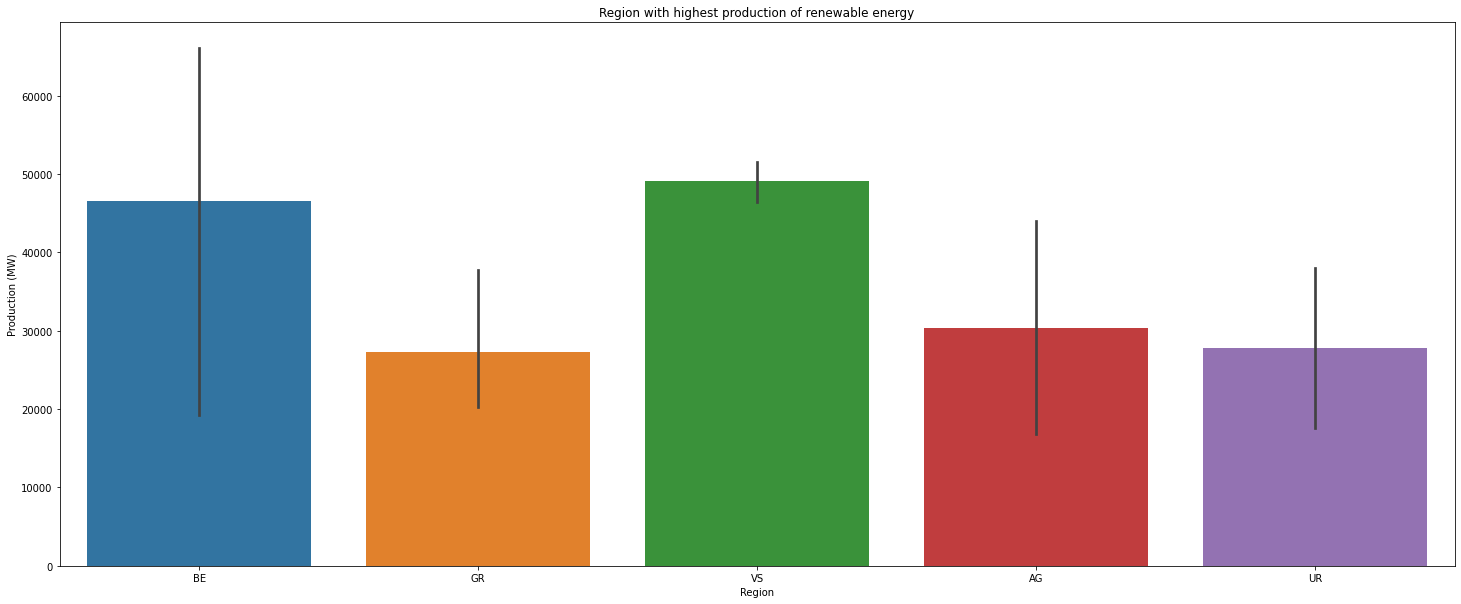

In [342]:
Region=[]
Production=[]
tmp = df.loc[df['Production']!=0]
tmp
tmp1 = tmp.sort_values(by='Production', ascending=False)[:20]
figure = plt.figure(figsize=(25,10))
sns.barplot(y=tmp1.Production, x=tmp1.Region)
plt.xticks()
plt.xlabel('Region')
plt.ylabel('Production (MW)')
plt.title('Region with highest production of renewable energy')
plt.show()

In [289]:
df1 = df
df1 = df1.loc[df['Start']!='ND']
df1["Start"] = df1["Start"].map(lambda x: dt.strptime(x, '%Y-%m-%d'))
df2 = df1.loc[df['End']!='ND']
df2["End"] = df2["End"].map(lambda x: dt.strptime(x, '%Y-%m-%d'))

/var/folders/3b/frlndxt95vb5hp0n0wy3v7d40000gn/T/ipykernel_736/3461838386.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/3b/frlndxt95vb5hp0n0wy3v7d40000gn/T/ipykernel_736/3461838386.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [326]:
year=[]
plantsYear=[]
source=[]
ye=[]
tmp = df2

for i in df2.index:
    ye.append(df2['Start'][i].year)
tmp['Year']=ye

for yr in tmp['Year'].unique():
    tmp1 = tmp.loc[tmp['Year']==yr]
    for s in tmp1['ESL2'].unique():
        tmp2 = tmp1.loc[tmp1['ESL2']==s]
        boolean = tmp1['ESL2']==s
        total_occurence = boolean.sum()
        plantsYear.append(total_occurence)
        year.append(yr)
        source.append(s)
tmp3 = pd.DataFrame(list(zip(year,plantsYear,source)), columns = ['Year', 'numberOfPlants','ESL2'])        
fig = px.line(tmp3, x="Year", y="numberOfPlants", color="ESL2", 
              title='Number of installation for year', template ="simple_white")
fig.show()

/var/folders/3b/frlndxt95vb5hp0n0wy3v7d40000gn/T/ipykernel_736/141591434.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [344]:
period=[]
tariff=[]
source=[]
rate=[]
startDate=[]
tmp = df2.loc[df2['Tariff']!=0]
for i in tmp.index:
    p = abs((tmp['End'][i] - tmp['Start'][i]).days)
    period.append(p)
    tariff.append(tmp['Tariff'][i])
    source.append(tmp['ESL2'][i])
    r = (p/365)/tmp['Tariff'][i]
    rate.append(r)
    startDate.append(tmp['Start'][i])
    
dataFrame = pd.DataFrame(list(zip(startDate, source,tariff,period, rate)), columns = ['Date', 'ESL2','Tariff', 'Period', 'ConvRate'])


In [348]:
dFrame1 = dataFrame

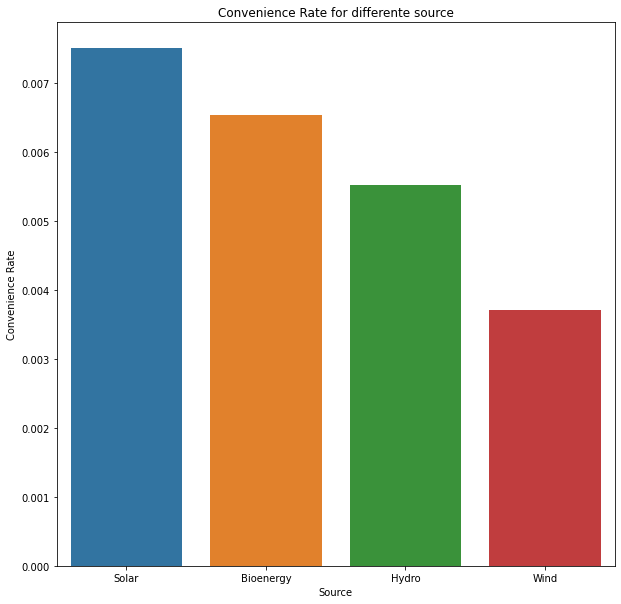

In [350]:
convRate=[]
source=[]

for s in dFrame1['ESL2'].unique():
    tmp = dFrame1.loc[df1['ESL2']==s]
    mean = tmp['ConvRate'].mean()
    convRate.append(mean)
    source.append(s)

dataFrame = pd.DataFrame(list(zip(source, convRate)), columns = ['Source', 'convRate'])

    
a = dataFrame.sort_values(by='convRate', ascending=False)[:4]
figure = plt.figure(figsize=(10,10))
sns.barplot(y=a.convRate, x=a.Source)
plt.xticks()
plt.xlabel('Source')
plt.ylabel('Convenience Rate')
plt.title('Convenience Rate for differente source')
plt.show()

In [352]:
dFrame1

,Date,ESL2,Tariff,Period,ConvRate,Year
0,2004-07-01,Bioenergy,578452.00,7488,0.000035,2004
1,2004-11-24,Bioenergy,228421.00,7342,0.000088,2004
2,2005-10-04,Bioenergy,622598.00,7393,0.000033,2005
3,2006-01-01,Hydro,349497.00,9495,0.000074,2006
4,2006-01-01,Bioenergy,598310.00,7669,0.000035,2006
...,...,...,...,...,...,...
12704,2018-11-07,Hydro,52190.60,9154,0.000481,2018
12705,2018-11-21,Hydro,6884.42,7314,0.002911,2018
12706,2018-12-03,Bioenergy,35703.00,7333,0.000563,2018
12707,2018-12-10,Hydro,3141.77,9152,0.007981,2018


In [353]:
convRate=[]
source=[]
year=[]
tmp = dFrame1
ye=[]
for i in dFrame1.index:
    ye.append(dFrame1['Date'][i].year)
tmp['Year']=ye
for yr in tmp['Year'].unique():
    tmp1 = tmp.loc[tmp['Year']==yr]
    for s in tmp1['ESL2'].unique():
        tmp2 = tmp1.loc[tmp1['ESL2']==s]
        convRate.append(tmp2['ConvRate'].mean())
        source.append(s)
        year.append(yr);

tmp3 = pd.DataFrame(list(zip(year, source, convRate)), columns = ['Year', 'Source', 'ConvRate'])
fig = px.line(tmp3, x="Year", y="ConvRate", color="Source", 
              title='Convenience rate for renewable sources in time',
              template="simple_white")
fig.show()
    

In [317]:
df2

,Company,Project,Start,End,Tariff,ESL2,ESL3,Technology,Capacity,Hub Height,...,Municipality Code,Postcode,Address,Lat,Lon,NUTS1,NUTS2,NUTS3,Production,Country
0,Otto Wartmann,BHKW Wartmann Holzhof Bissegg,2004-07-01,2024-12-31,578452.0,Bioenergy,Biomass and biogas,Other or unspecified technology,0.755,0.0,...,8514.0,8514.0,Holzhof / Hüttlingerstrasse 22,47.561900,9.035300,CH0,CH05,CH057,1127.500,Switzerland
1,Davos Biogas GmbH,Biogasanlage Davos,2004-11-24,2024-12-31,228421.0,Bioenergy,Biomass and biogas,Other or unspecified technology,0.080,0.0,...,7260.0,7260.0,Duchliweg 13,46.808300,9.839300,CH0,CH05,CH056,499.121,Switzerland
2,Armin Müller-Flühler,B BHKW Armin Müller-Flühler Ermensee,2005-10-04,2025-12-31,622598.0,Bioenergy,Biomass and biogas,Other or unspecified technology,0.260,0.0,...,6294.0,6294.0,Grundacher 2,47.227800,8.236300,CH0,CH06,CH061,1475.020,Switzerland
3,Hydroelectra AG,Wasserkraftanlage Frinvillier,2006-01-01,2031-12-31,349497.0,Hydro,ND,Other or unspecified technology,0.450,0.0,...,2535.0,2535.0,Rue du canal 41,47.169100,7.254900,CH0,CH02,CH021,1327.940,Switzerland
4,Val Biogas GmbH,Biogas Val Visp,2006-01-01,2026-12-31,598310.0,Bioenergy,Biomass and biogas,Other or unspecified technology,0.480,0.0,...,3930.0,3930.0,Grosseye 12,46.294200,7.908400,CH0,CH01,CH012,1425.600,Switzerland
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1887268,ND,ND,2011-10-01,2018-01-31,0.0,Bioenergy,Other or unspecified,ND,0.253,0.0,...,43205.0,ND,ND,45.346565,4.322328,FRK,FRK1,FRK13,0.000,France
1888543,ND,ND,2012-01-10,2018-01-14,0.0,Hydro,ND,Other or unspecified technology,0.270,0.0,...,38337.0,ND,ND,45.360472,5.487182,FRK,FRK2,FRK24,0.000,France
1891673,ND,ND,2013-02-14,2018-01-01,0.0,Bioenergy,Other or unspecified,ND,0.800,0.0,...,44208.0,ND,ND,47.612712,-1.528115,FRG,FRG0,FRG01,0.000,France
1894961,ND,ND,2014-09-10,2034-09-10,0.0,Solar,ND,Other or unspecified technology,0.070,0.0,...,73074.0,ND,ND,45.421601,6.294102,FRK,FRK2,FRK27,0.000,France


In [355]:
period=[]
tariff=[]
source=[]
rate=[]
startDate=[]
company=[]
tmp = df2.loc[df2['Tariff']!=0]
for i in tmp.index:
    p = abs((tmp['End'][i] - tmp['Start'][i]).days)
    period.append(p)
    tariff.append(tmp['Tariff'][i])
    source.append(tmp['ESL2'][i])
    r = (p/365)/tmp['Tariff'][i]
    rate.append(r)
    startDate.append(tmp['Start'][i])
    company.append(tmp['Company'][i])
    
dataFrame = pd.DataFrame(list(zip(startDate, source,tariff,period, rate, company)), columns = ['Date', 'ESL2','Tariff', 'Period', 'ConvRate', 'Company'])

AVGConvRate=[]
Company=[]
Source=[]
for c in dataFrame['Company'].unique():
    df10 = dataFrame.loc[dataFrame['Company']==c]
    for s in df10['ESL2'].unique():
        df11 = df10.loc[df10['ESL2']==s]
        AVGConvRate.append(df11['ConvRate'].mean())
        Company.append(c)
        Source.append(s)
dataFrame1 = pd.DataFrame(list(zip(Source, Company,AVGTariff)), columns = ['Source', 'Company','AVGConvRate'])

In [356]:
bioFrame = dataFrame1.loc[dataFrame1['Source']=='Bioenergy']
bioFrame = bioFrame.loc[bioFrame['AVGConvRate']!=0]
windFrame = dataFrame1.loc[dataFrame1['Source']=='Wind']
windFrame = windFrame.loc[windFrame['AVGConvRate']!=0]
solarFrame = dataFrame1.loc[dataFrame1['Source']=='Solar']
solarFrame = solarFrame.loc[solarFrame['AVGConvRate']!=0]
hydroFrame = dataFrame1.loc[dataFrame1['Source']=='Hydro']
hydroFrame = hydroFrame.loc[hydroFrame['AVGConvRate']!=0]

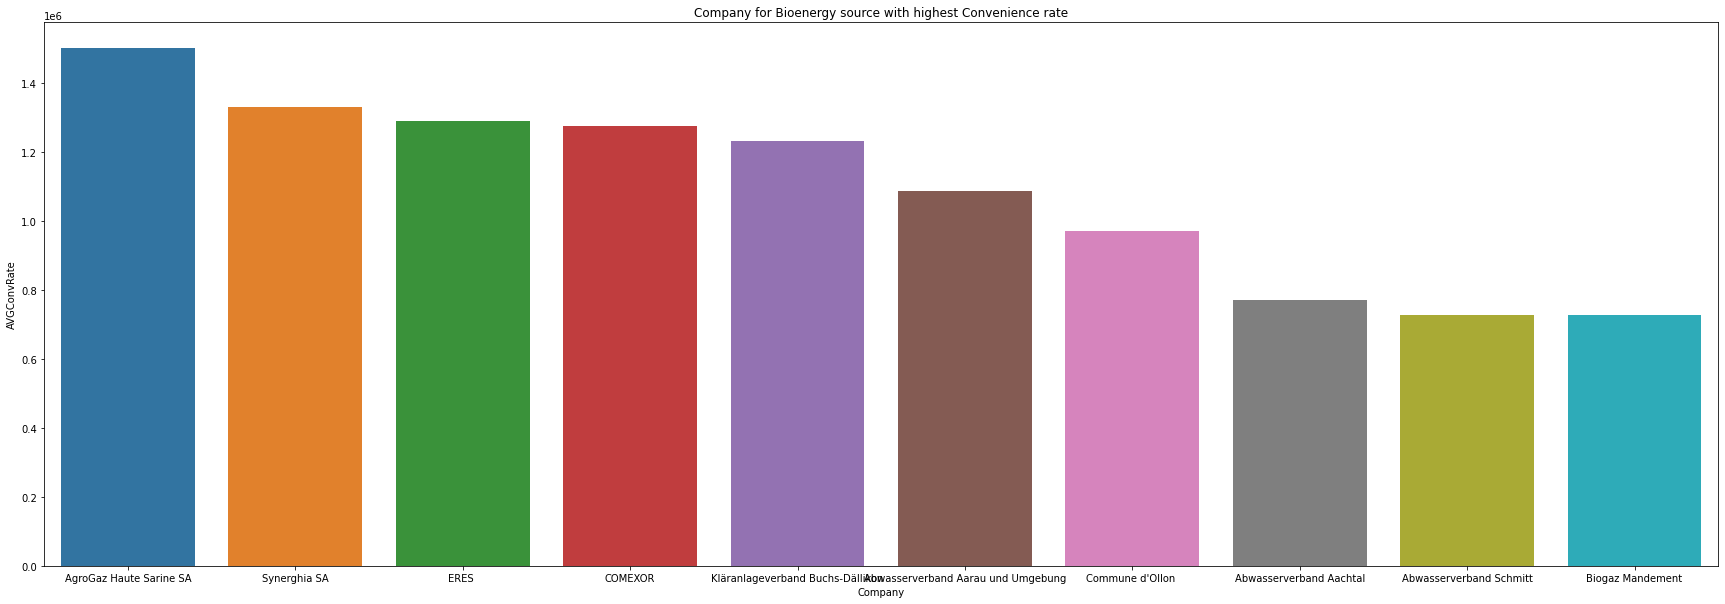

In [359]:
gdp = bioFrame.sort_values(by='AVGConvRate', ascending=False)[:10]
figure = plt.figure(figsize=(30,10))
sns.barplot(y=gdp.AVGConvRate, x=gdp.Company)
plt.xticks()
plt.xlabel('Company')
plt.ylabel('AVGConvRate')
plt.title('Company for Bioenergy source with highest Convenience rate')
plt.show()

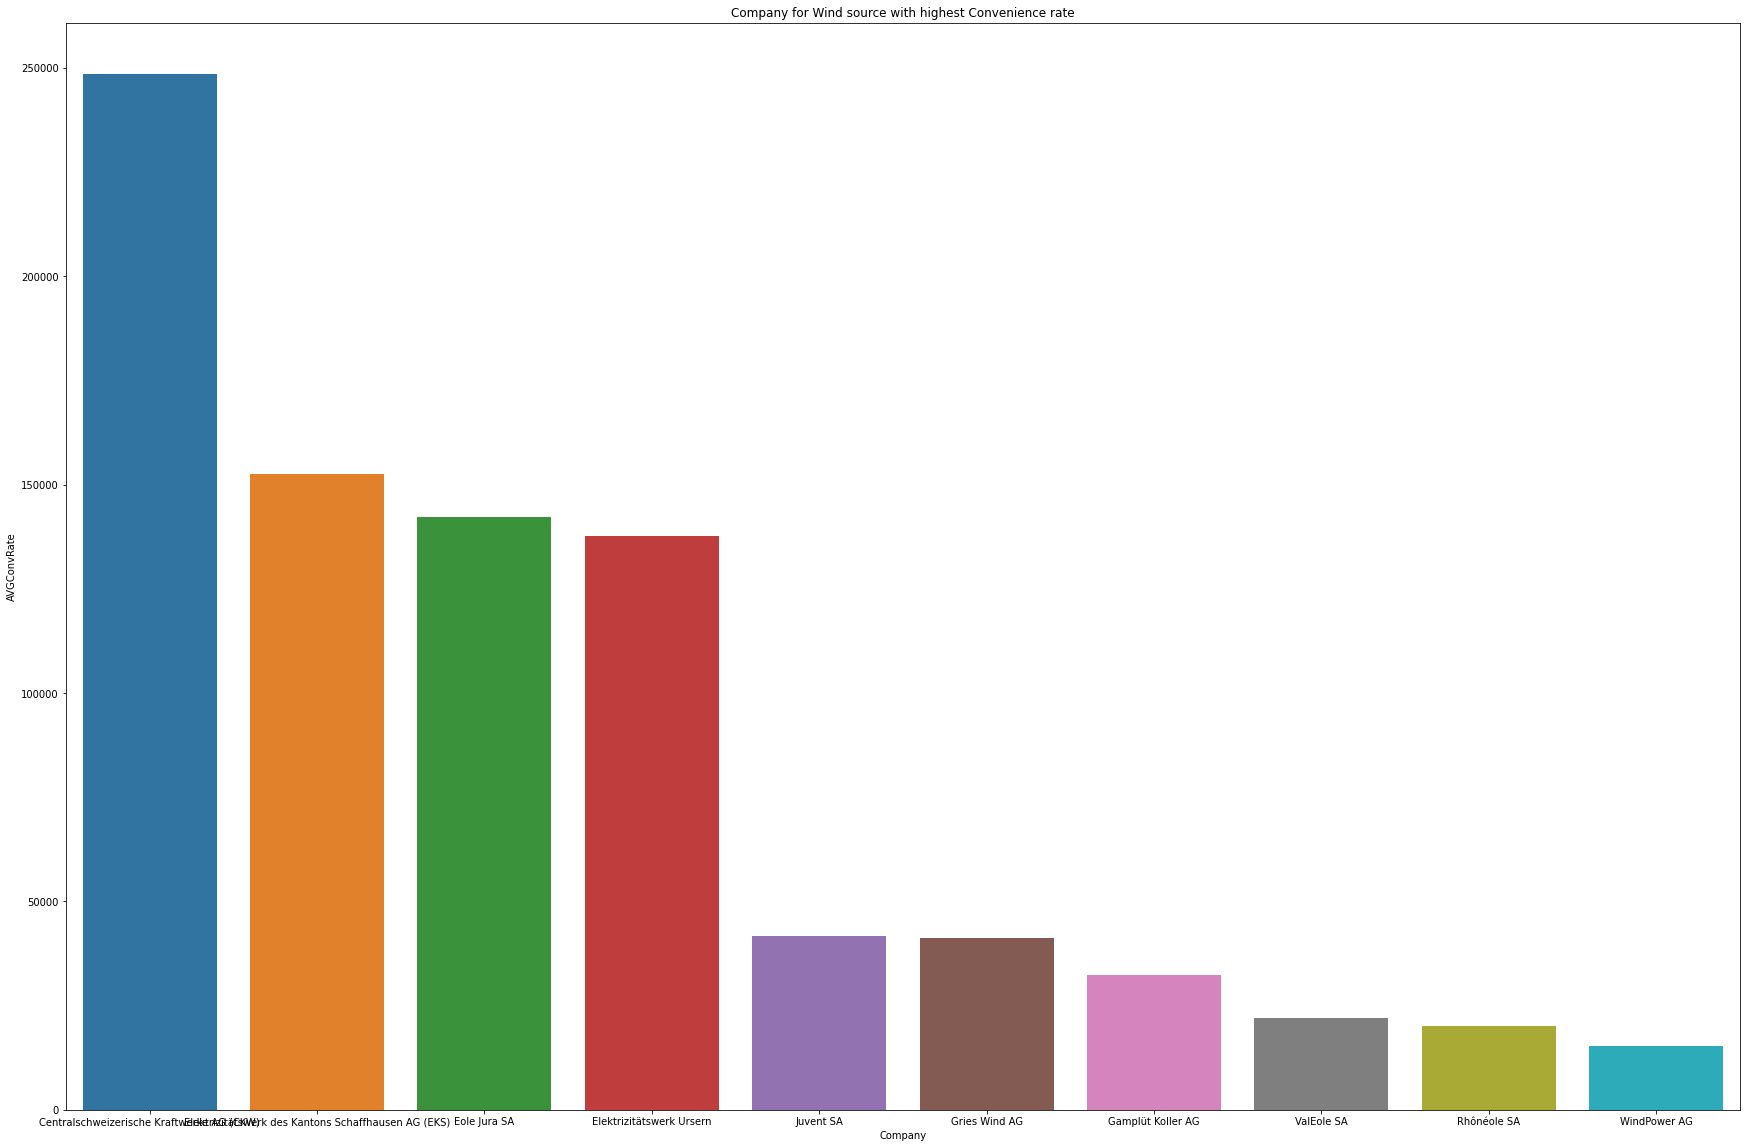

In [365]:
gdp = windFrame.sort_values(by='AVGConvRate', ascending=False)[:10]
figure = plt.figure(figsize=(30,20))
sns.barplot(y=gdp.AVGConvRate, x=gdp.Company)
plt.xticks()
plt.xlabel('Company')
plt.ylabel('AVGConvRate')
plt.title('Company for Wind source with highest Convenience rate')
plt.show()

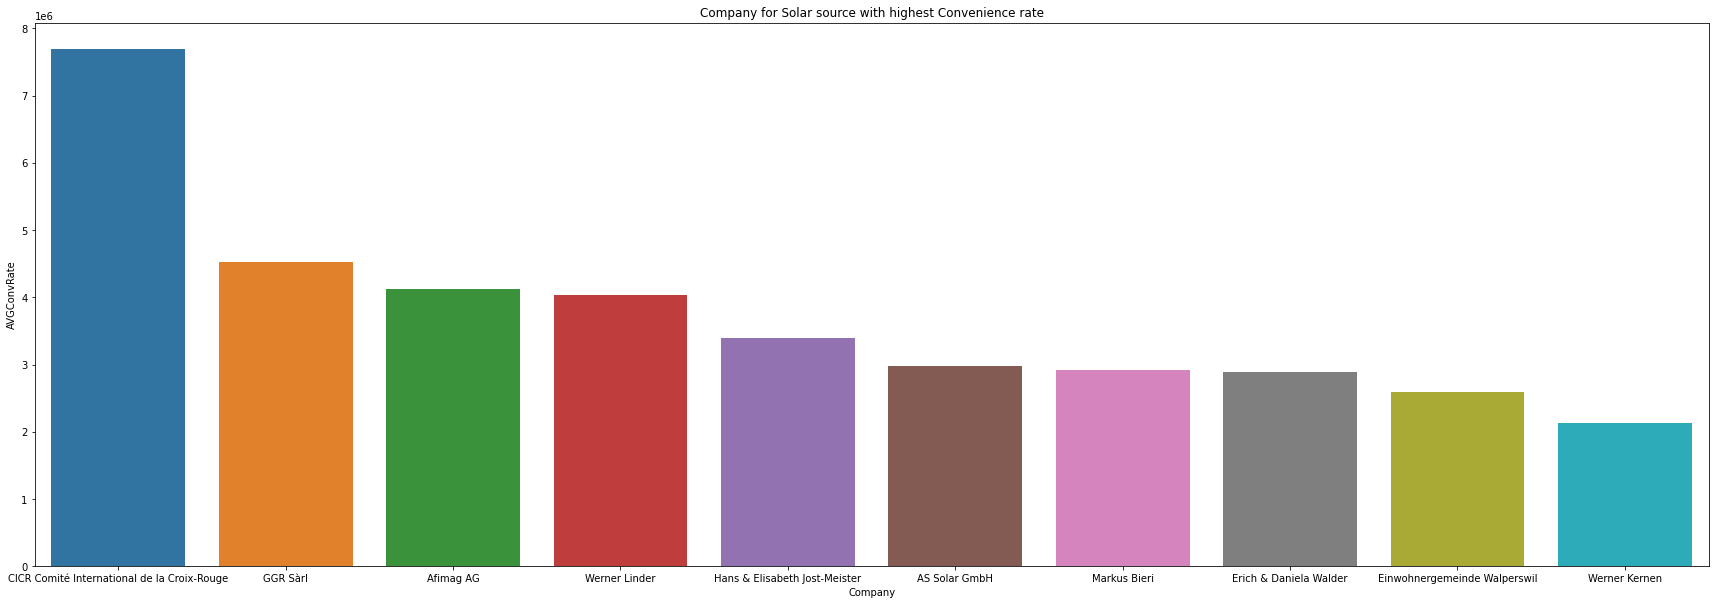

In [366]:
gdp = solarFrame.sort_values(by='AVGConvRate', ascending=False)[:10]
figure = plt.figure(figsize=(30,10))
sns.barplot(y=gdp.AVGConvRate, x=gdp.Company)
plt.xticks()
plt.xlabel('Company')
plt.ylabel('AVGConvRate')
plt.title('Company for Solar source with highest Convenience rate')
plt.show()

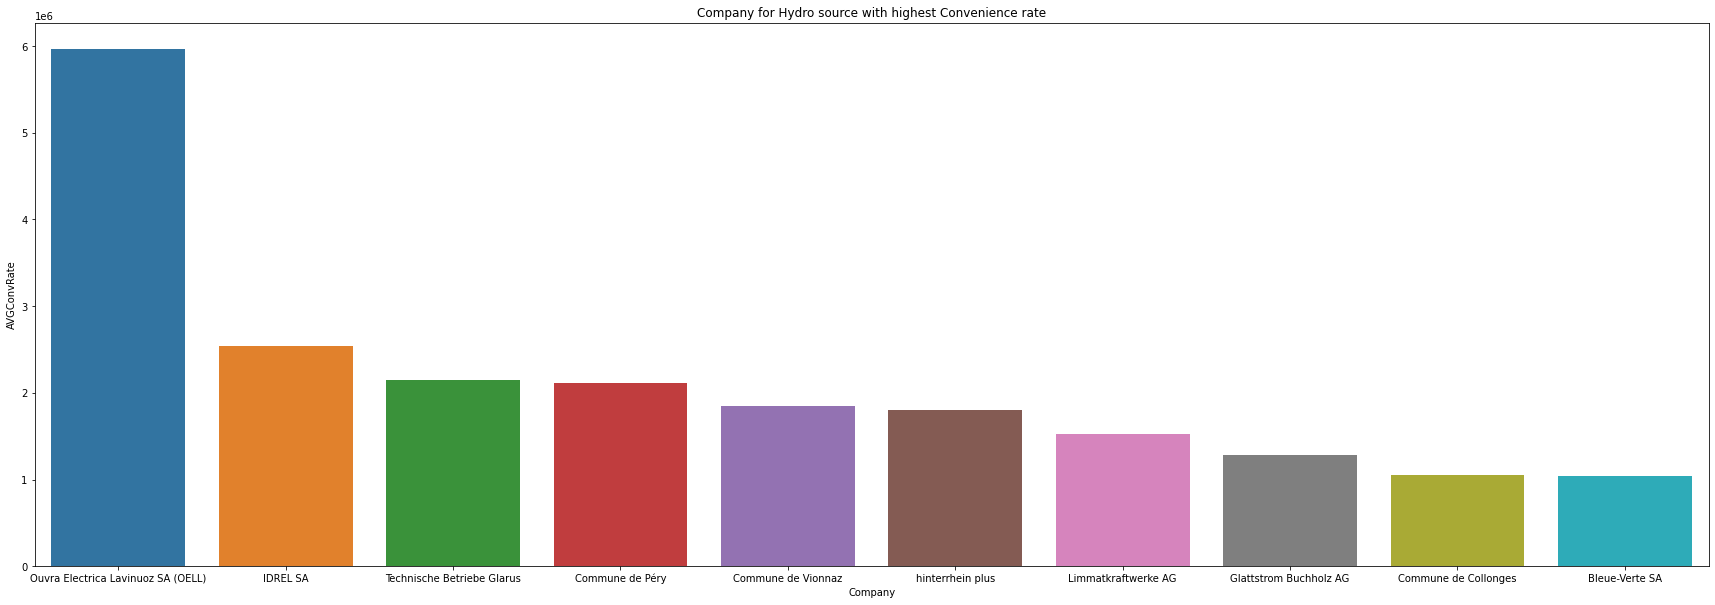

In [367]:
gdp = hydroFrame.sort_values(by='AVGConvRate', ascending=False)[:10]
figure = plt.figure(figsize=(30,10))
sns.barplot(y=gdp.AVGConvRate, x=gdp.Company)
plt.xticks()
plt.xlabel('Company')
plt.ylabel('AVGConvRate')
plt.title('Company for Hydro source with highest Convenience rate')
plt.show()